# 01 — Exploratory Data Analysis (EDA)
Understanding the London bike sharing dataset.

In [1]:
import sys
import os
from pathlib import Path

# Add project root to Python path so `src` can be imported
ROOT = Path("..").resolve()
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

print("Project root added to path:", ROOT)

Project root added to path: /Users/alhajm/london-bike-demand


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from src.data_io import load_bike_data

print("Imports OK")

Imports OK


/Users/alhajm/london-bike-demand/venv/lib/python3.12/site-packages/pandera/_pandas_deprecated.py:149: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)


In [3]:
df = load_bike_data("../data/raw/london_merged.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,1.0,0.0,1.0,3.0


## 1. Basic Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,17414,2016-01-03 22:31:00.571953664,2015-01-04 00:00:00,2015-07-04 20:15:00,2016-01-03 15:30:00,2016-07-04 15:45:00,2017-01-03 23:00:00,NaN
cnt,17414.0,1143.101642,0.0,257.0,844.0,1671.75,7860.0,1085.108068
t1,17414.0,12.468091,-1.5,8.0,12.5,16.0,34.0,5.571818
t2,17414.0,11.520836,-6.0,6.0,12.5,16.0,34.0,6.615145
hum,17414.0,0.72325,0.205,0.63,0.745,0.83,1.0,0.143132
wind_speed,17414.0,15.913063,0.0,10.0,15.0,20.5,56.5,7.89457
weather_code,17414.0,2.722752,1.0,1.0,2.0,3.0,26.0,2.341163
is_holiday,17414.0,0.022051,0.0,0.0,0.0,0.0,1.0,0.146854
is_weekend,17414.0,0.285403,0.0,0.0,0.0,1.0,1.0,0.451619
season,17414.0,1.492075,0.0,0.0,1.0,2.0,3.0,1.118911


In [6]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

## 2. Time Series Structure
Check date ranges and create time-based features.

In [7]:
df["timestamp"].min(), df["timestamp"].max()

(Timestamp('2015-01-04 00:00:00'), Timestamp('2017-01-03 23:00:00'))

In [8]:
df["hour"] = df["timestamp"].dt.hour
df["weekday"] = df["timestamp"].dt.weekday
df["month"] = df["timestamp"].dt.month
df["year"] = df["timestamp"].dt.year
df["day"] = df["timestamp"].dt.day

## 3. Target Variable — `cnt`
This is the total number of bike rentals per hour.

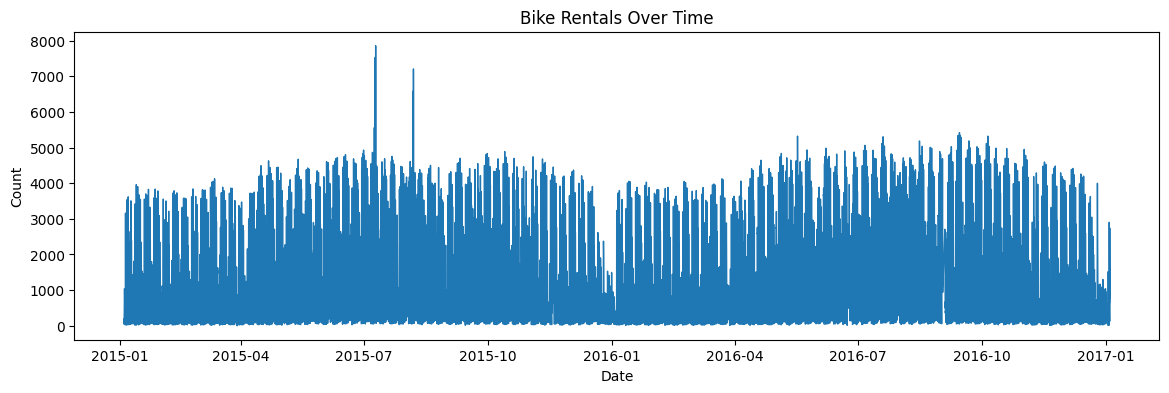

In [9]:
plt.figure(figsize=(14, 4))
plt.plot(df["timestamp"], df["cnt"], linewidth=1)
plt.title("Bike Rentals Over Time")
plt.ylabel("Count")
plt.xlabel("Date")
plt.savefig("../reports/figures/bike_over_time.png")
plt.show()

## 4. Seasonality Check

<Axes: title={'center': 'Average Bike Rentals by Hour'}, xlabel='hour'>

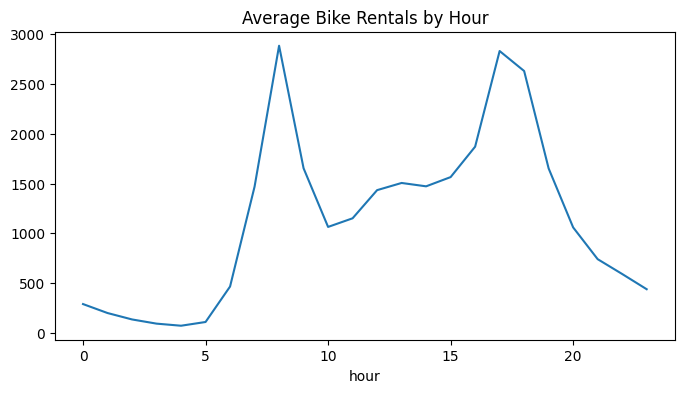

In [10]:
df.groupby("hour")["cnt"].mean().plot(figsize=(8, 4), title="Average Bike Rentals by Hour")

<Axes: title={'center': 'Average Rentals by Weekday (0=Mon)'}, xlabel='weekday'>

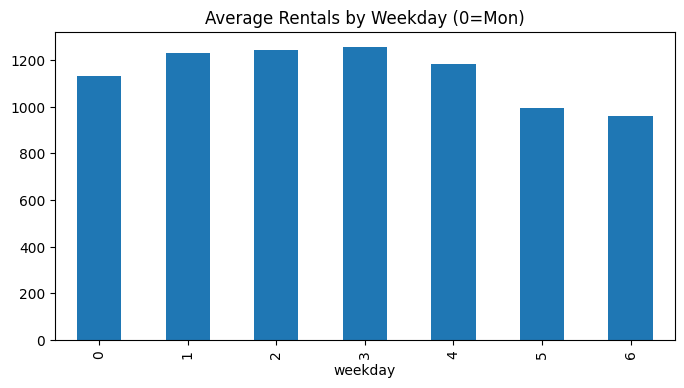

In [11]:
df.groupby("weekday")["cnt"].mean().plot(
    kind="bar",
    figsize=(8, 4),
    title="Average Rentals by Weekday (0=Mon)",
)

<Axes: title={'center': 'Average Rentals by Month'}, xlabel='month'>

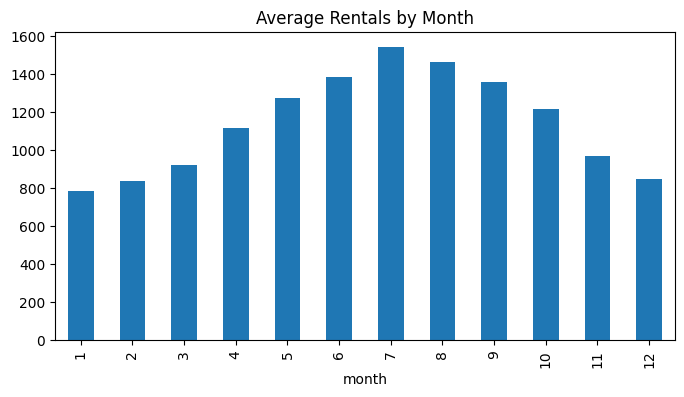

In [12]:
df.groupby("month")["cnt"].mean().plot(
    kind="bar",
    figsize=(8, 4),
    title="Average Rentals by Month",
)

## 5. Weekend vs. Weekday Behavior
Are weekends busier or quieter?

In [13]:
df["is_weekend"] = df["weekday"].isin([5, 6]).astype(int)

df.groupby("is_weekend")["cnt"].mean()

is_weekend
0    1209.274831
1     977.415694
Name: cnt, dtype: float64

<Axes: title={'center': 'Average Rentals: Weekend vs Weekday'}, xlabel='is_weekend'>

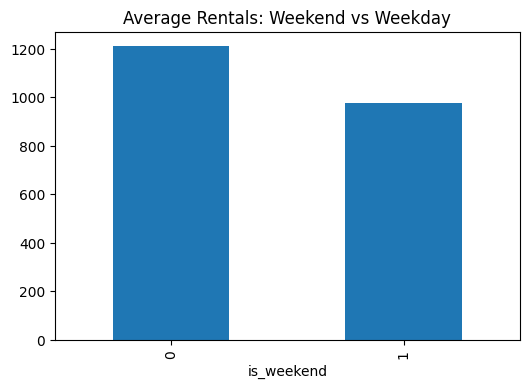

In [14]:
df.groupby("is_weekend")["cnt"].mean().plot(
    kind="bar",
    figsize=(6, 4),
    title="Average Rentals: Weekend vs Weekday",
)

## 6. Weather Effects on Usage
Check how temperature, humidity, and wind influence usage.

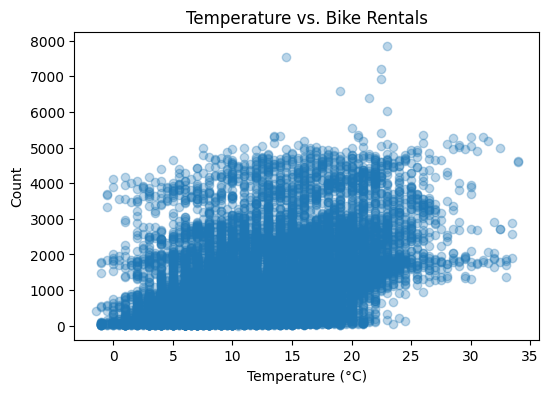

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(df["t1"], df["cnt"], alpha=0.3)
plt.title("Temperature vs. Bike Rentals")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.savefig("../reports/figures/temp_influence.png")
plt.show()

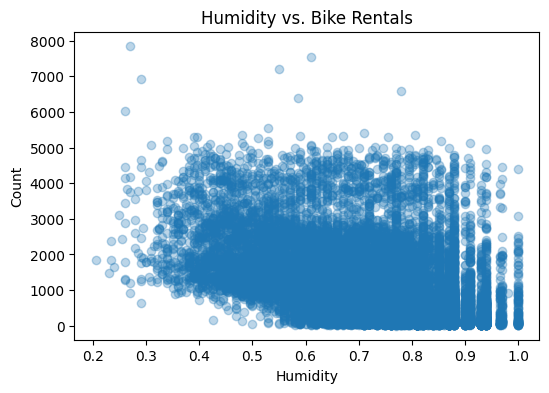

In [16]:
plt.figure(figsize=(6, 4))
plt.scatter(df["hum"], df["cnt"], alpha=0.3)
plt.title("Humidity vs. Bike Rentals")
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.show()

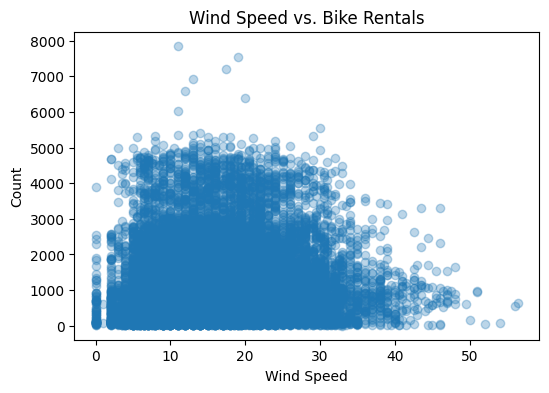

In [17]:
plt.figure(figsize=(6, 4))
plt.scatter(df["wind_speed"], df["cnt"], alpha=0.3)
plt.title("Wind Speed vs. Bike Rentals")
plt.xlabel("Wind Speed")
plt.ylabel("Count")
plt.show()

## 7. Correlation Structure
Which features appear to be most related to bike usage?

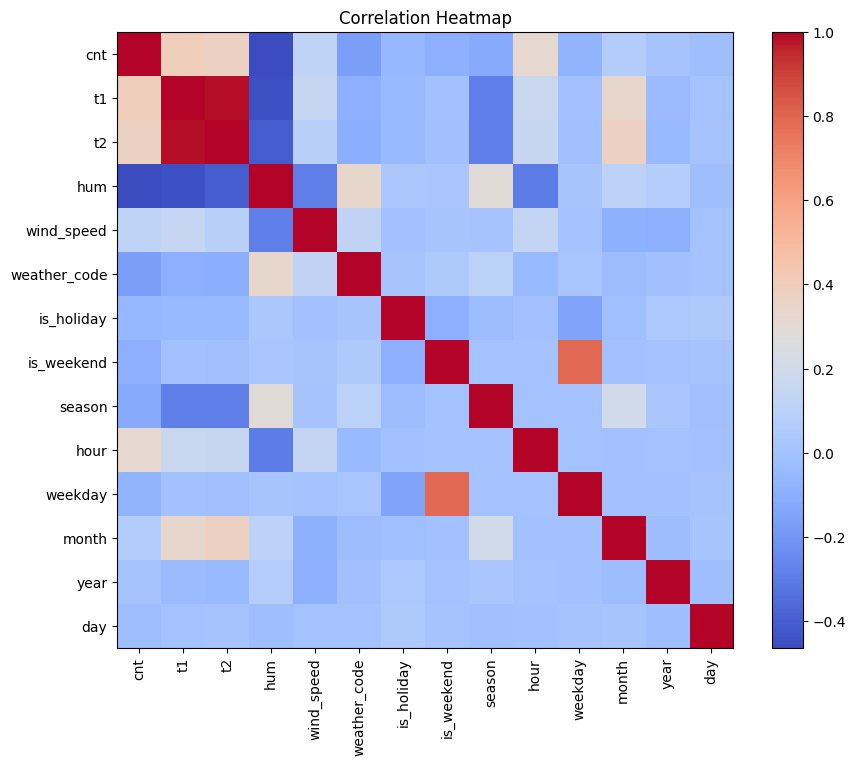

In [18]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

## 8. Outlier Exploration
Look for unusually high or low rental counts.

<Axes: title={'center': 'Distribution of Bike Rentals'}>

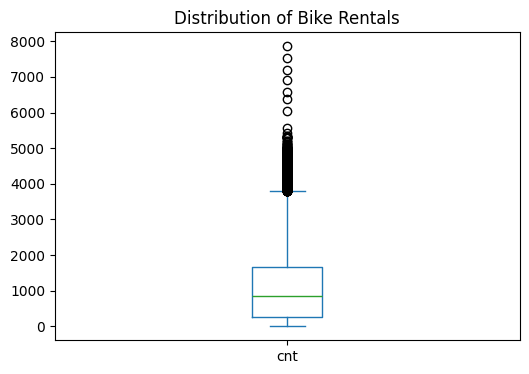

In [19]:
df["cnt"].plot(kind="box", figsize=(6, 4), title="Distribution of Bike Rentals")